# Predicción de precios de laptops

## Descripción

Este conjunto de datos contiene registros de ordenadores portátiles con diversas especificaciones de hardware y precios. Se analizarán las caracteristicas que influyen en el precio y asi construir un modelo predictivo.

**FUENTE :** Kaggle (https://www.kaggle.com/datasets/asinow/laptop-price-dataset)

**OBJECTIVO :**  Explorar el dataset para entender los patrones de precios y características de las laptops.
## Columnas:

* Brand: El fabricante del portátil (por ejemplo, Dell, HP, Apple, Asus, Lenovo).

* Processor: El modelo de CPU, incluidos Intel (i3, i5, i7, i9) y AMD Ryzen (3, 5, 7, 9).

* RAM (GB): El tamaño de la memoria del portátil (por ejemplo, 4 GB, 8 GB, 16 GB, 32 GB, 64 GB).

* Storage: Tipo y tamaño de almacenamiento (por ejemplo, 256 GB SSD, 512 GB SSD, 1 TB HDD).

* GPU: La unidad de procesamiento gráfico, integrada o dedicada (por ejemplo, Nvidia GTX 1650, RTX 3060).

* Screen Size (inch): El tamaño de la pantalla en pulgadas (por ejemplo, 13,3", 14", 15,6", 17,3").

* Resolution: La resolución de la pantalla, como 1366x768, 1920x1080, 2560x1440 o 3840x2160.

* Battery Life (hours): La duración estimada de la batería en horas, que oscila entre 4 y 12 horas.

* Size (kg): El peso del portátil en kilogramos, entre 1,2 kg y 3,5 kg.

* Operating System: El sistema operativo preinstalado, que incluye Windows, macOS, Linux y FreeDOS.

* Price ($): La variable objetivo, que representa el precio del portátil en dólares estadounidenses.

# Primeras vista de los datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Cargar el dataset
df = pd.read_csv('laptop_prices.csv')

In [ ]:
# Mostrar las primeros 5 filas
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [ ]:
# Mostrar las ultimas 5 filas
df.tail()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13
11767,Samsung,Intel i7,8,256GB SSD,Nvidia RTX 3080,17.3,2560x1440,6.4,2.45,FreeDOS,1579.55


In [ ]:
# Mostrar el tamaño del dataset
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset tiene 11768 filas y 11 columnas


In [ ]:
#Nombres de las columnas
print(f'Columnas: {df.columns}')

Columnas: Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')


In [ ]:
# Tipos de datos de cada columnas
df.dtypes

,0
Brand,object
Processor,object
RAM (GB),int64
Storage,object
GPU,object
Screen Size (inch),float64
Resolution,object
Battery Life (hours),float64
Weight (kg),float64
Operating System,object


In [ ]:
# Cantidad de valores únicos de cada columnas
df.nunique()

,0
Brand,10
Processor,8
RAM (GB),5
Storage,5
GPU,7
Screen Size (inch),5
Resolution,4
Battery Life (hours),81
Weight (kg),231
Operating System,4


In [ ]:
# Nombres unicos de cada columna
for col in df.columns:
  if df[col].nunique() <= 10:
    print(col, df[col].unique())

Brand ['Apple' 'Razer' 'Asus' 'Lenovo' 'Acer' 'Dell' 'Microsoft' 'HP' 'Samsung'
 'MSI']
Processor ['AMD Ryzen 3' 'AMD Ryzen 7' 'Intel i5' 'Intel i3' 'AMD Ryzen 9'
 'AMD Ryzen 5' 'Intel i9' 'Intel i7']
RAM (GB) [64  4 32  8 16]
Storage ['512GB SSD' '1TB SSD' '2TB SSD' '256GB SSD' '1TB HDD']
GPU ['Nvidia GTX 1650' 'Nvidia RTX 3080' 'Nvidia RTX 3060'
 'AMD Radeon RX 6600' 'Nvidia RTX 2060' 'AMD Radeon RX 6800' 'Integrated']
Screen Size (inch) [17.3 14.  13.3 16.  15.6]
Resolution ['2560x1440' '1366x768' '3840x2160' '1920x1080']
Operating System ['FreeDOS' 'Linux' 'Windows' 'macOS']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [ ]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [ ]:
# Verificar duplicados
print(f'Numeros de filas duplicadas: {df.duplicated().sum()}')

Numeros de filas duplicadas: 0


In [ ]:
# Valores nulos
print('Porcentaje de valores nulos por columnas:')
df.isnull().mean() * 100

Porcentaje de valores nulos por columnas:


,0
Brand,0.0
Processor,0.0
RAM (GB),0.0
Storage,0.0
GPU,0.0
Screen Size (inch),0.0
Resolution,0.0
Battery Life (hours),0.0
Weight (kg),0.0
Operating System,0.0


## Conclusiones iniciales:

* **Tamaño del dataset :** Contiene 11,768 filas y 11 columnas. El dataset es de tamaño moderado.

* **Tipos de datos**
 *  6 variable categoricas (Brand, Processor, Storage, GPU, Resolution, Operating System)
 *  5 variables numericas (RAM, Screen Size, Battery Life, Weight, Price)
* **Valores nulos:** El dataset no presenta valores nulos.
* **Valores duplicados:** El dataset no presenta valores duplicados.

# Analisis de variables individuales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## GRAFICOS PARA DATOS NUMERICOS

In [ ]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
col_num_1 = ['Battery Life (hours)', 'Weight (kg)', 'Price ($)']
col_num_2 = ['RAM (GB)', 'Screen Size (inch)']

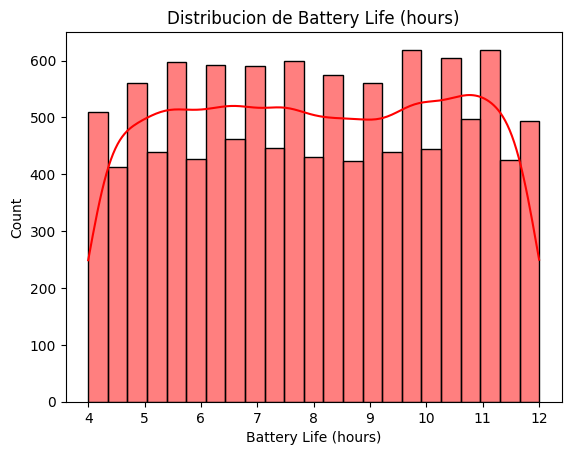

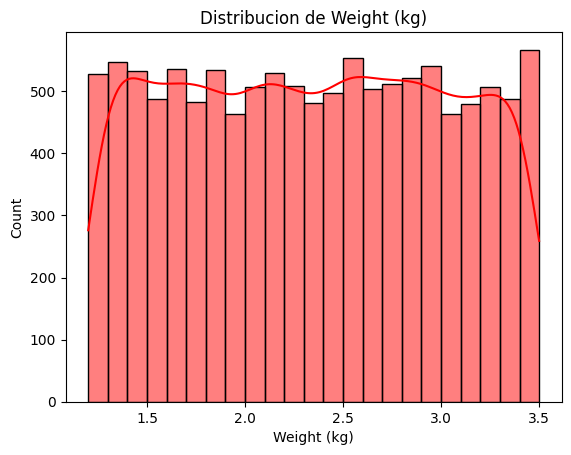

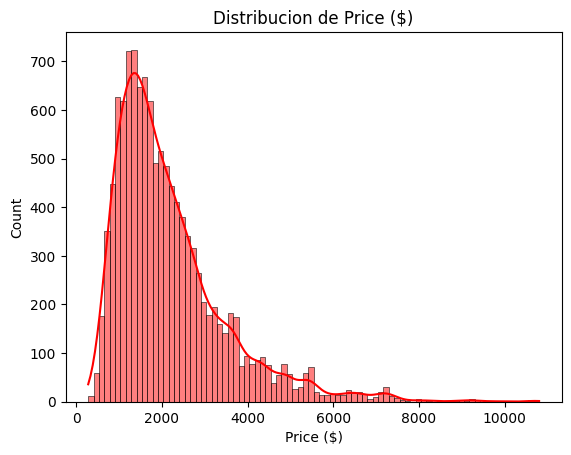

In [ ]:
for col in col_num_1:
  #plt.figure(figsize=(10, 6))
  sns.histplot(data= df, x=col, color="red", kde=True)
  plt.title(f'Distribucion de {col}')
  plt.show()

OBSERVACIONES

* Se aprecia que Battery Life (hours) y Weight (kg) tiene una distribución cercana a la normalidad.

* Price ($) tiene una distribución sesgada a la derecha.

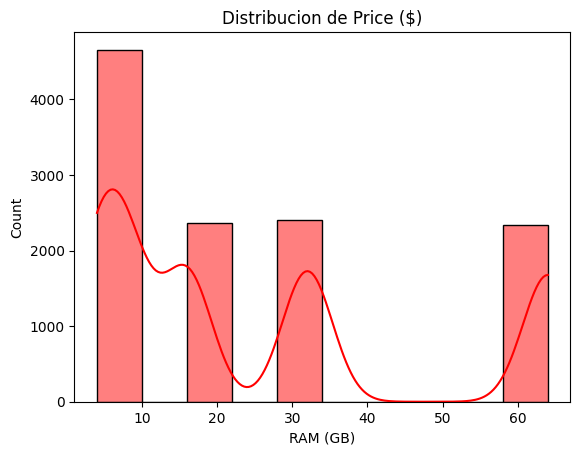

In [ ]:
sns.histplot(data= df, x='RAM (GB)', color="red", kde=True, bins= 10)
plt.title(f'Distribucion de {col}')
plt.show()

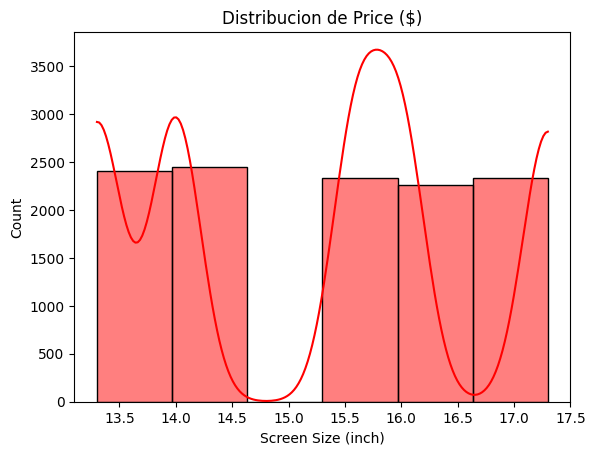

In [ ]:
sns.histplot(data= df, x='Screen Size (inch)', color="red", kde=True, bins= 6)
plt.title(f'Distribucion de {col}')
plt.show()

In [ ]:
df['RAM (GB)'].value_counts().sort_index()

,count
RAM (GB),
4,2361
8,2296
16,2361
32,2410
64,2340


In [ ]:
df['Screen Size (inch)'].value_counts().sort_index()

,count
Screen Size (inch),
13.3,2402
14.0,2443
15.6,2331
16.0,2258
17.3,2334


Observaciones:

* Por la grafica parece que 'RAM (GB)' sigue una  distribución sesgada a la derecha. Pero segun los valores concretos tanto 'RAM (GB)' y 'Screen Size (inch)' siguen una distribución simetrica ya que sus valores estan cercanas entre si.

## GRAFICOS PARA DATOS CATEGORICOS

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


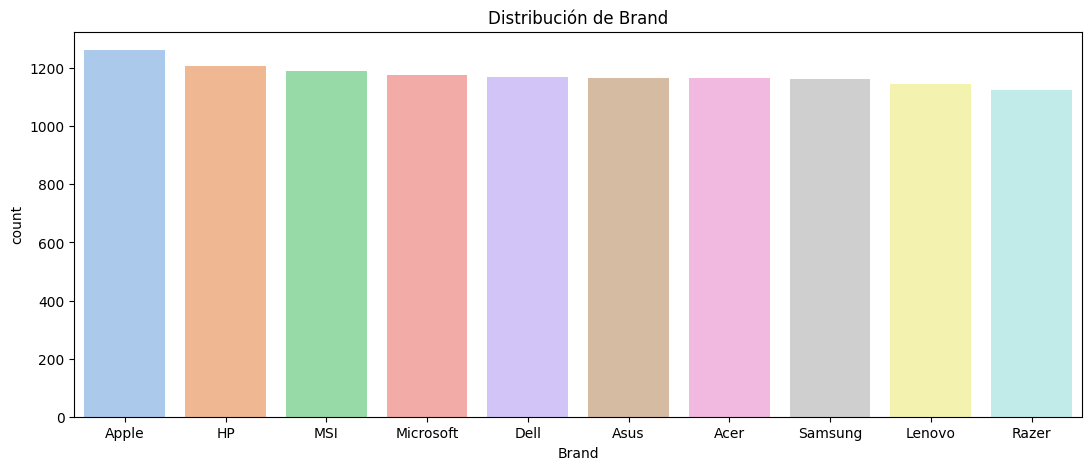

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


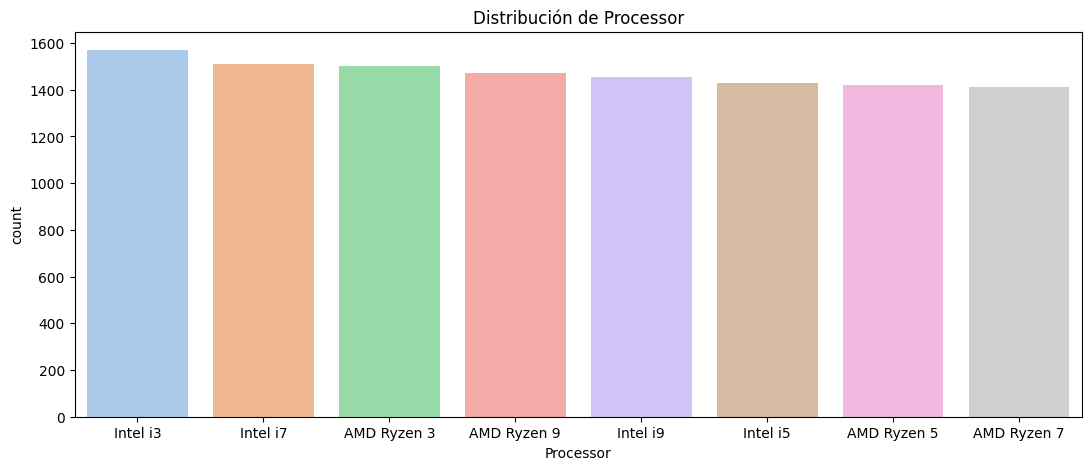

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


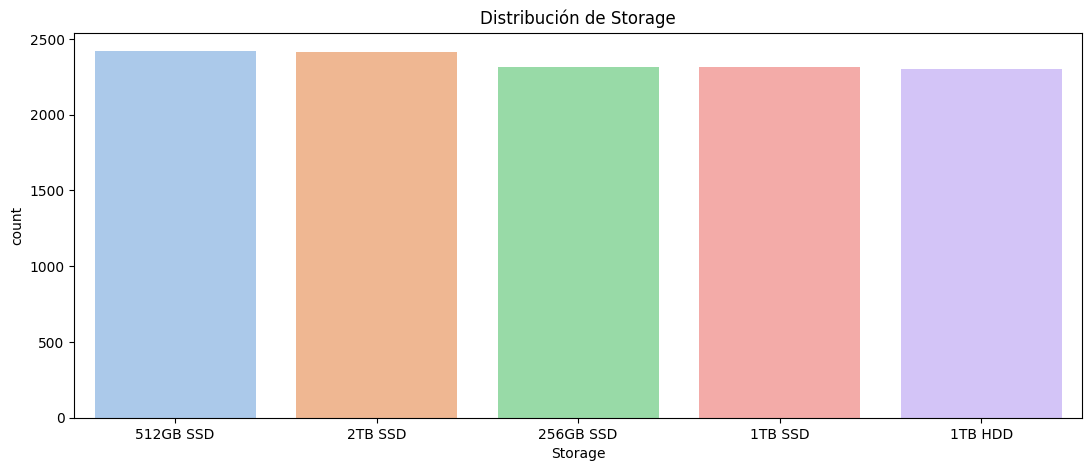

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


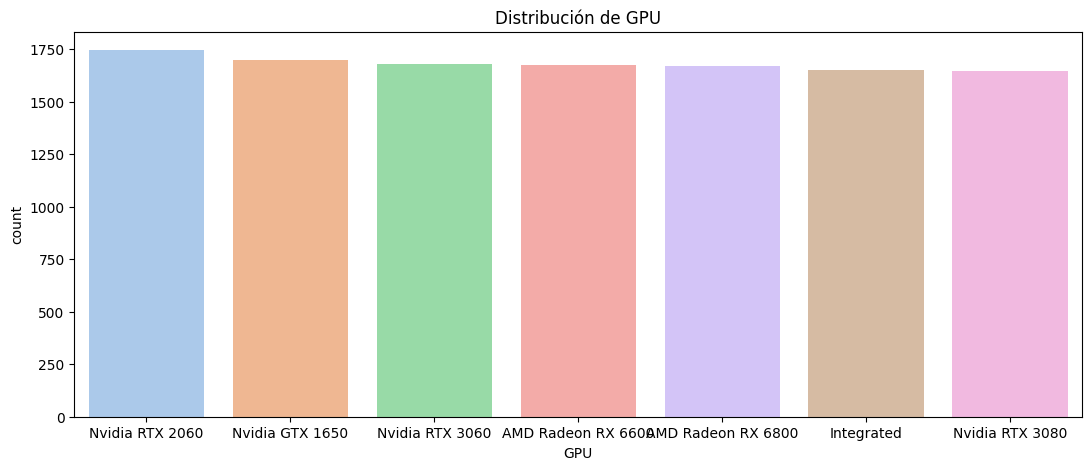

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


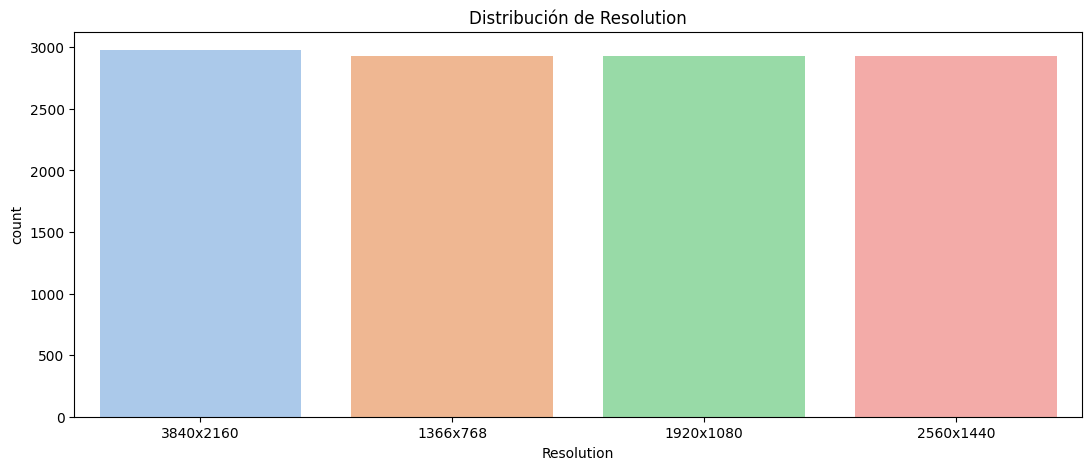

<ipython-input-22-eb4fb858d568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)


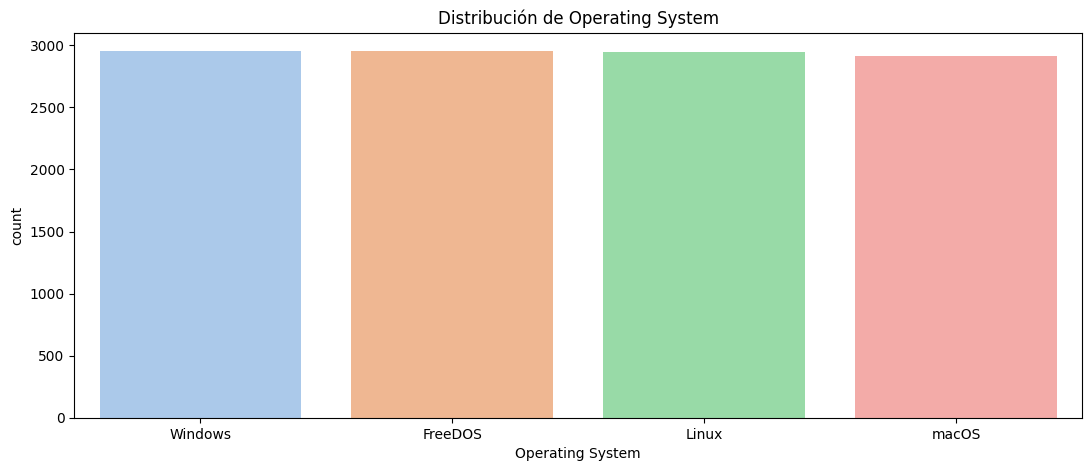

In [ ]:
col_cat = df.select_dtypes(include= 'object').columns

for col in col_cat:
  plt.figure(figsize=(13, 5))
  sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
  plt.title(f'Distribución de {col}')
  plt.show()

Conclusiones

Notamos que en todas las features categoricas en cada tipo todas tienen casi la mima cantidad. No hay una diferencia relevante o exagerada entre ellas.

# GRAFICOS DE CORRELACION

In [ ]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns

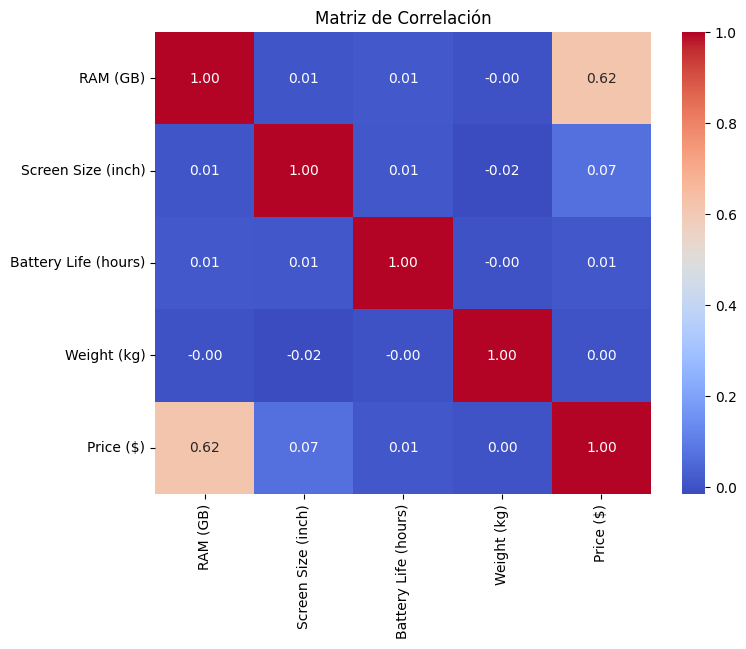

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[col_num].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# GRAFICOS DE CAJA

In [ ]:
col_cat = df.select_dtypes(include='object').columns

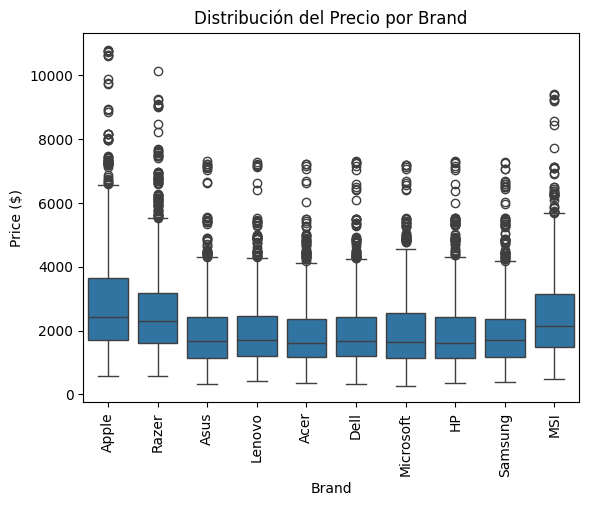

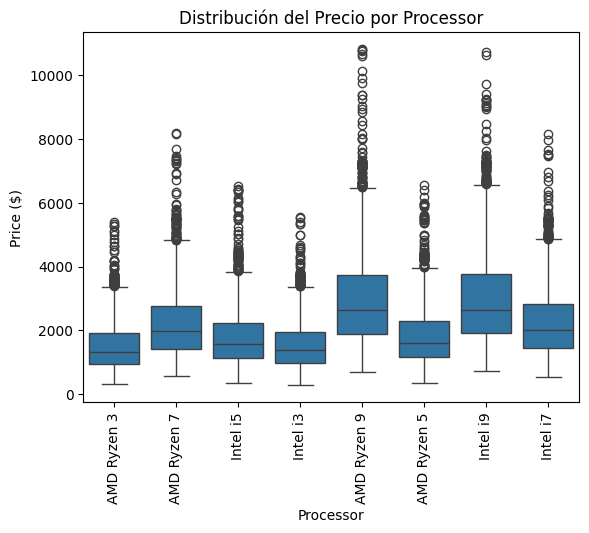

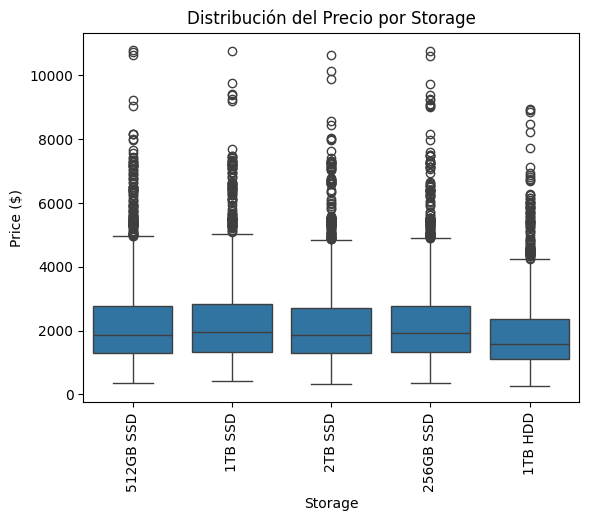

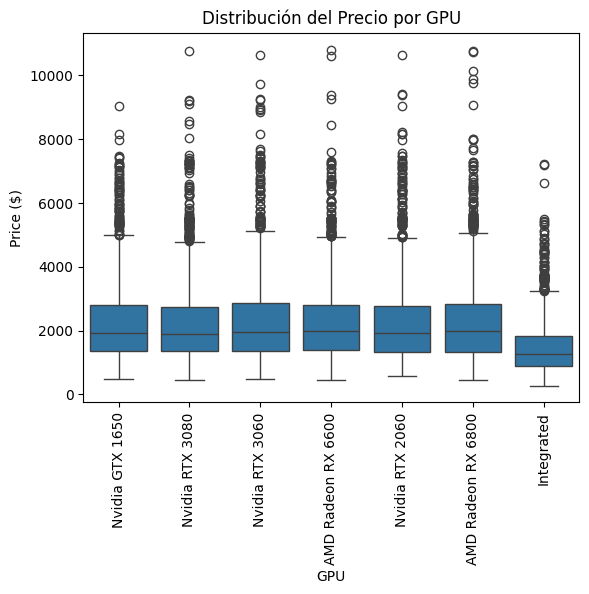

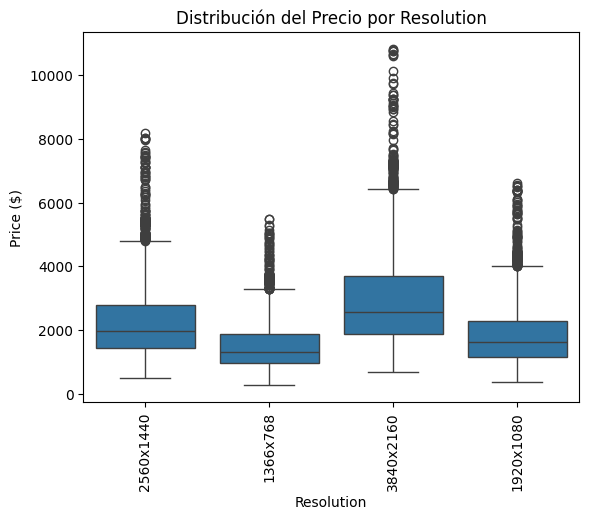

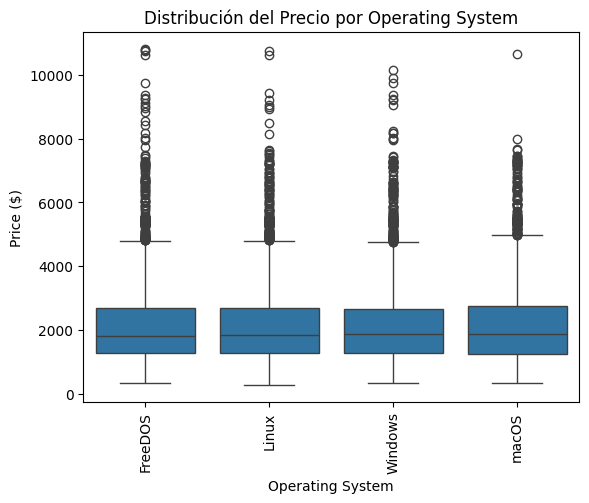

In [ ]:
for col in col_cat:
  if col != 'Price ($)':
    sns.boxplot(data=df, x=col, y = 'Price ($)')
    plt.xticks(rotation=90)
    plt.title(f"Distribución del Precio por {col}")
    plt.show()

In [ ]:
from scipy import stats

In [ ]:
anova_list = []
for col in col_cat:
  anova_result = stats.f_oneway(*(df[df[col] == item]['Price ($)'] for item in df[col].unique()))

  anova_list.append({'Feature': col,
                      'Estadístico': anova_result[0],
                      'P-valor': anova_result[1],
                      'Interpretación': 'Significativo' if anova_result[1] < 0.05 else 'No significativo'
                      })

anova_df = pd.DataFrame(anova_list)

In [ ]:
anova_df

,Feature,Estadístico,P-valor,Interpretación
0,Brand,107.148932,8.920888e-194,Significativo
1,Processor,402.157952,0.000000e+00,Significativo
2,Storage,32.769004,3.257975e-27,Significativo
3,GPU,90.782516,8.156405e-112,Significativo
4,Resolution,847.849436,0.000000e+00,Significativo
5,Operating System,0.040564,9.891125e-01,No significativo


Segun el Analisis de Varianza (ANOVA) se puede determimar:

* Brand, Processor, Storage, GPU y Resolution influyen significativamente en el precio. Uno más que otros.

* Solo el Operating System es quien no influye en nada o casi nada en el precio.

# PREPROCESAMIENTO

## Transformación

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Creo una copia para el modelo de CatBoost
df_cat = df.copy()

In [ ]:
encoder = OneHotEncoder(sparse_output= False).set_output(transform='pandas')

In [ ]:
trans_enc = encoder.fit_transform(df[col_cat])

In [ ]:
df = pd.concat( [df, trans_enc], axis = 1 ).drop(col_cat, axis = 1)

## Normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creo una copia para los modelos de Random forest, XGBoost y LightGBM
df_tree = df.copy()

In [ ]:
# Tomo todaslas columnas excepto el precio
col_num = col_num[:-1]

In [ ]:
scaler = StandardScaler()

In [ ]:
df[col_num] = scaler.fit_transform(df[col_num])

# Modelo

In [ ]:
list_metricas = []

In [ ]:
def metricas(nombre, r2, mse, rmse):
  list_metricas.append({
      'Modelo': nombre,
      'R2': r2,
      'MSE': mse,
      'RMSE': rmse
  })

  df_metricas = pd.DataFrame(list_metricas)
  return df_metricas

## Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price ($)'])
y = df['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.8794665524047012
MSE (regresión lineal): 213594.64425480852
RMSE (regresión lineal): 462.1630061513021


In [ ]:
metricas('Regresión Lineal (v1)', r2, mse, rmse)

,Modelo,R2,MSE,RMSE
0,Regresión Lineal (v1),0.879467,213594.644255,462.163006


## Random Forest Regressor

In [ ]:
X = df_tree.drop(columns=['Price ($)'])
y = df_tree['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()#(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.9776766941711421
MSE (regresión lineal): 39558.634239979714
RMSE (regresión lineal): 198.8935248819823


In [ ]:
metricas('Random Forest Regressor  (V1)', r2, mse, rmse)

,Modelo,R2,MSE,RMSE
0,Regresión Lineal (v1),0.879467,213594.644255,462.163006
1,Random Forest Regressor (V1),0.977677,39558.634240,198.893525


## XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()#(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.9907090593531089
MSE (regresión lineal): 16464.269477534104
RMSE (regresión lineal): 128.3131695405195


In [ ]:
metricas('XGBoost  (V1)', r2, mse, rmse)

,Modelo,R2,MSE,RMSE
0,Regresión Lineal (v1),0.879467,213594.644255,462.163006
1,Random Forest Regressor (V1),0.977677,39558.634240,198.893525
2,XGBoost (V1),0.990709,16464.269478,128.313170


## LightGBM

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np


model_lgb = lgb.LGBMRegressor()

In [ ]:
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 9414, number of used features: 42
[LightGBM] [Info] Start training from score 2176.877232


LGBMRegressor()

In [ ]:
y_pred_lgb = model_lgb.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.9931819058764384
MSE (regresión lineal): 12082.193099691416
RMSE (regresión lineal): 109.91902974322242


In [ ]:
metricas('LightGBM  (V1)', r2, mse, rmse)

,Modelo,R2,MSE,RMSE
0,Regresión Lineal (v1),0.879467,213594.644255,462.163006
1,Random Forest Regressor (V1),0.977677,39558.634240,198.893525
2,XGBoost (V1),0.990709,16464.269478,128.313170
3,LightGBM (V1),0.993182,12082.193100,109.919030


## CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
X = df_cat.drop(columns=['Price ($)'])
y = df_cat['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor()#(iterations=1000, learning_rate=0.05, depth=10, verbose=200)

In [ ]:
categoricas = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']

model_cat.fit(X_train, y_train, cat_features = categoricas)

Learning rate set to 0.058349
0:	learn: 1259.1014710	total: 62.6ms	remaining: 1m 2s
1:	learn: 1204.9014077	total: 75.4ms	remaining: 37.6s
2:	learn: 1156.0806476	total: 86.7ms	remaining: 28.8s
3:	learn: 1107.9452328	total: 95.9ms	remaining: 23.9s
4:	learn: 1063.7590019	total: 106ms	remaining: 21.1s
5:	learn: 1017.2002542	total: 115ms	remaining: 19s
6:	learn: 973.7060818	total: 122ms	remaining: 17.4s
7:	learn: 933.1963106	total: 131ms	remaining: 16.2s
8:	learn: 895.6098559	total: 139ms	remaining: 15.3s
9:	learn: 860.0968584	total: 147ms	remaining: 14.5s
10:	learn: 826.5115259	total: 155ms	remaining: 13.9s
11:	learn: 792.3115013	total: 165ms	remaining: 13.6s
12:	learn: 760.5687757	total: 173ms	remaining: 13.1s
13:	learn: 730.1902391	total: 182ms	remaining: 12.8s
14:	learn: 704.2939292	total: 190ms	remaining: 12.4s
15:	learn: 681.2144141	total: 199ms	remaining: 12.2s
16:	learn: 657.2492780	total: 207ms	remaining: 12s
17:	learn: 631.6177128	total: 215ms	remaining: 11.7s
18:	learn: 611.81602

In [ ]:
y_pred_cat = model_cat.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_cat)
mse = mean_squared_error(y_test, y_pred_cat)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.9950007012667109
MSE (regresión lineal): 8859.146201855094
RMSE (regresión lineal): 94.12303757239826


In [ ]:
metricas('CatBoost (V1)', r2, mse, rmse)

,Modelo,R2,MSE,RMSE
0,Regresión Lineal (v1),0.879467,213594.644255,462.163006
1,Random Forest Regressor (V1),0.977677,39558.634240,198.893525
2,XGBoost (V1),0.990709,16464.269478,128.313170
3,LightGBM (V1),0.993182,12082.193100,109.919030
4,CatBoost (V1),0.995001,8859.146202,94.123038


 Observaciones:

 * R2 (Coeficiente de determinacion): Este valor nos indica la variabilidad en los precios de las laptops. Un valor cercano a uno sugiere que el modelo tiene un buen ajuste y que es capaz de hacer predicciones precisas para la mayoría de los casos. Según los modelos probados el que presenta mejor resultado es **CatBoost** con 0.995 aproximadamente seguido de **LightGBM**, **XGBoost**  con 0.993 y 0.991 respectivamente.

 * MSE (Mean Square Error) :  Este valor muestra que el modelo tiene un error promedio de unidades cuadradas. Aunque es relitavamente alto en la mayoria de modelos, el MSE se utiliza para comparar modelo destacando nuevamente **CatBoost**.

 * RMSE (Root Mean Square Error) : El valor de RMSE es la raíz cuadrada del MSE y se expresa en las mismas unidades que los precios. Esto significa que el modelo, tiene un error de predicción de x unidades. Comparando nuevamente los modelos vemos que **CatBoost** es el que tiene el valor más bajo lo que indica que el modelo está haciendo predicciones bastante cercanas a los valores reales.

**CONCLUSIONES**

El modelo CatBoost presenta un desempeño sobresaliente según las métricas. El R2 muy alto (0.995) indica que el modelo captura la mayoría de la variabilidad en los datos. Las métricas de MSE y RMSE muestran que el modelo tiene un error de predicción moderado, pero aceptable, considerando el rango de precios de las laptops.



# Optimizacion de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Regresion Lineal

In [ ]:
X = df.drop(columns=['Price ($)'])
y = df['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
param_lr = {
    'fit_intercept': [True, False]
    #'normalize': [True, False]
    #'alpha': [0.1, 1, 10, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_lr, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'fit_intercept': True}


## Random Forest Regressor

In [ ]:
X = df_tree.drop(columns=['Price ($)'])
y = df_tree['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
rfr = RandomForestRegressor()

random_search = RandomizedSearchCV(rfr, param_forest, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print("Mejores hiperparámetros para Random Forest:", random_search.best_params_)

## XGBoost

In [ ]:
param_xgboost = {
    'n_estimators': [100, 1000],
    'learning_rate': [0.01, 0.3],
    'max_depth': [3, 10],
    'min_child_weight': [1, 6],
    'subsample': [0.6, 0.4],
    'colsample_bytree': [0.6, 0.4],
}

In [ ]:
xgboost = XGBRegressor()

random_search = RandomizedSearchCV(xgboost, param_xgboost, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print("Mejores hiperparámetros para XGBoost:", random_search.best_params_)

## LightGBM

In [ ]:
param_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 40, 60],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
gbm = lgb.LGBMRegressor()

random_search = RandomizedSearchCV(gbm, param_gbm, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print("Mejores hiperparámetros para LightGBM:", random_search.best_params_)

## CatBoost

In [ ]:
X = df_cat.drop(columns=['Price ($)'])
y = df_cat['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostRegressor(silent=True)

param_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}


In [ ]:
cat = CatBoostRegressor()

random_search = RandomizedSearchCV(cat, param_cat, n_iter=100, cv=5, n_jobs= -1, verbose=2, random_state=42)

In [ ]:
random_search.fit(X_train, y_train, cat_features = categoricas)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0:	learn: 1210.8268382	total: 27.4ms	remaining: 8.2s
1:	learn: 1109.4999384	total: 47.1ms	remaining: 7.02s
2:	learn: 1020.9098892	total: 62.3ms	remaining: 6.17s
3:	learn: 943.2010720	total: 78.5ms	remaining: 5.81s
4:	learn: 871.7867437	total: 98.9ms	remaining: 5.83s
5:	learn: 809.4327913	total: 112ms	remaining: 5.5s
6:	learn: 747.0064627	total: 126ms	remaining: 5.28s
7:	learn: 690.3168396	total: 138ms	remaining: 5.04s
8:	learn: 641.1261055	total: 151ms	remaining: 4.88s
9:	learn: 596.5066278	total: 164ms	remaining: 4.77s
10:	learn: 556.6169583	total: 176ms	remaining: 4.61s
11:	learn: 519.6833040	total: 186ms	remaining: 4.47s
12:	learn: 487.3082134	total: 197ms	remaining: 4.36s
13:	learn: 461.3454752	total: 208ms	remaining: 4.25s
14:	learn: 435.8913958	total: 220ms	remaining: 4.18s
15:	learn: 413.9016426	total: 233ms	remaining: 4.14s
16:	learn: 394.3444924	total: 244ms	remaining: 4.07s
17:	learn: 374.1968012	total: 257ms	rema

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7848f3a15750>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [ ]:
print("Mejores hiperparámetros para CatBoost:", random_search.best_params_)

Mejores hiperparámetros para CatBoost: {'subsample': 1.0, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 7}


In [ ]:
Mejores hiperparámetros para CatBoost: {'subsample': 1.0, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 7}

In [ ]:
model_cat = CatBoostRegressor(subsample= 1.0, learning_rate= 0.1, l2_leaf_reg= 1, iterations= 300, depth= 7)

In [ ]:
categoricas

['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']

In [ ]:
model_cat.fit(X_train, y_train, cat_features = categoricas)

0:	learn: 1210.8268382	total: 17.9ms	remaining: 5.36s
1:	learn: 1109.4999384	total: 33.2ms	remaining: 4.95s
2:	learn: 1020.9098892	total: 44.8ms	remaining: 4.43s
3:	learn: 943.2010720	total: 57ms	remaining: 4.22s
4:	learn: 871.7867437	total: 72.4ms	remaining: 4.27s
5:	learn: 809.4327913	total: 83.6ms	remaining: 4.1s
6:	learn: 747.0064627	total: 97.7ms	remaining: 4.09s
7:	learn: 690.3168396	total: 110ms	remaining: 4s
8:	learn: 641.1261055	total: 123ms	remaining: 3.96s
9:	learn: 596.5066278	total: 133ms	remaining: 3.87s
10:	learn: 556.6169583	total: 147ms	remaining: 3.86s
11:	learn: 519.6833040	total: 159ms	remaining: 3.81s
12:	learn: 487.3082134	total: 169ms	remaining: 3.74s
13:	learn: 461.3454752	total: 180ms	remaining: 3.67s
14:	learn: 435.8913958	total: 192ms	remaining: 3.65s
15:	learn: 413.9016426	total: 203ms	remaining: 3.6s
16:	learn: 394.3444924	total: 214ms	remaining: 3.55s
17:	learn: 374.1968012	total: 228ms	remaining: 3.57s
18:	learn: 358.1726727	total: 240ms	remaining: 3.55s


In [ ]:
y_pred_cat = model_cat.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred_cat)
mse = mean_squared_error(y_test, y_pred_cat)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 (regresión lineal): {r2}')
print(f'MSE (regresión lineal): {mse}')
print(f'RMSE (regresión lineal): {rmse}')

R2 (regresión lineal): 0.9947144108571755
MSE (regresión lineal): 9366.475075277876
RMSE (regresión lineal): 96.78055112096581


# Validacion Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_cat = CatBoostRegressor(cat_features = categoricas)

# Realizar validación cruzada usando 5 pliegues (cv=5)
# cross_val_score devuelve una lista con los resultados de cada pliegue
#cv_results = cross_val_score(model_cat, X_train, y_train, cv=5, scoring='neg_mean_squared_error')#, fit_params={'cat_features': categoricas})


In [ ]:
c_v = 3
cv_results_mse = cross_val_score(model_cat, X_train, y_train, cv= c_v, scoring='neg_mean_squared_error')#, fit_params={'cat_features': [0, 2, 4]})
cv_results_rmse = cross_val_score(model_cat, X_train, y_train, cv= c_v, scoring='neg_root_mean_squared_error')#, fit_params={'cat_features': [0, 2, 4]})
cv_results_r2 = cross_val_score(model_cat, X_train, y_train, cv= c_v, scoring='r2')#, fit_params={'cat_features': [0, 2, 4]})


Se han truncado las últimas 5000 líneas del flujo de salida.
4:	learn: 1071.6263997	total: 43ms	remaining: 8.55s
5:	learn: 1029.6080351	total: 49.3ms	remaining: 8.17s
6:	learn: 992.5358163	total: 55.7ms	remaining: 7.9s
7:	learn: 957.3981641	total: 62.1ms	remaining: 7.7s
8:	learn: 921.8420397	total: 69.7ms	remaining: 7.67s
9:	learn: 888.0893108	total: 76ms	remaining: 7.53s
10:	learn: 855.7489216	total: 82.7ms	remaining: 7.43s
11:	learn: 822.8452936	total: 89.8ms	remaining: 7.4s
12:	learn: 792.8791713	total: 96.1ms	remaining: 7.29s
13:	learn: 766.2618560	total: 108ms	remaining: 7.62s
14:	learn: 740.4101462	total: 117ms	remaining: 7.68s
15:	learn: 714.0002472	total: 123ms	remaining: 7.58s
16:	learn: 688.7835937	total: 130ms	remaining: 7.53s
17:	learn: 666.3015480	total: 136ms	remaining: 7.44s
18:	learn: 643.9886143	total: 143ms	remaining: 7.4s
19:	learn: 623.1242660	total: 151ms	remaining: 7.41s
20:	learn: 603.9017887	total: 158ms	remaining: 7.37s
21:	learn: 584.8995022	total: 164ms	remai

In [ ]:
print("Resultados de MSE por pliegue:", -cv_results_mse)
print("Promedio de MSE:", -cv_results_mse.mean())
print()
print("Resultados de RMSE por pliegue:", -cv_results_rmse)
print("Promedio de RMSE:", -cv_results_rmse.mean())
print()
print("Resultados de R² por pliegue:", cv_results_r2)
print("Promedio de R²:", cv_results_r2.mean())

Resultados de MSE por pliegue: [10379.07498658  8818.08985144 10531.52522921]
Promedio de MSE: 9909.563355744707

Resultados de RMSE por pliegue: [101.8777453   93.90468493 102.62321974]
Promedio de RMSE: 99.46854998703684

Resultados de R² por pliegue: [0.99426382 0.99474493 0.99374948]
Promedio de R²: 0.994252745210466


# Graficos de prediccion

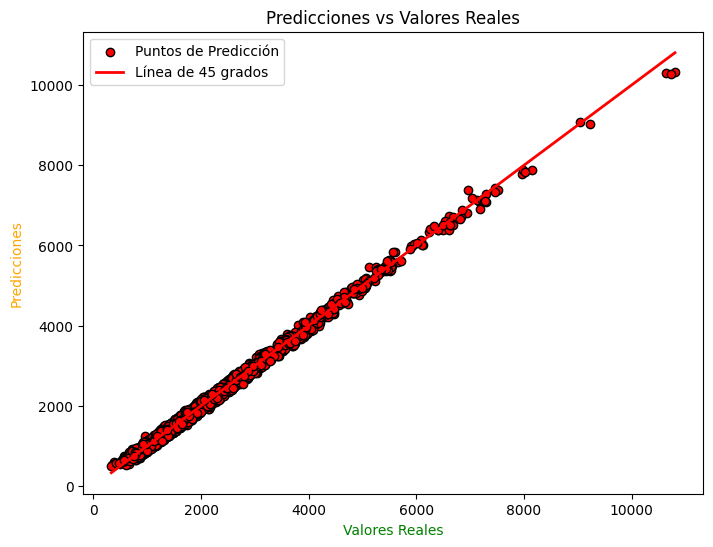

In [ ]:
# Gráfico de dispersión: Valores reales vs. Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cat, color='blue', label='Predicciones')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea de 45 grados')  # Línea de ajuste perfecta
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


**CONCLUSIONES**

El grafico muestra la relación entre los valores reales de los precios de las laptops(eje x) y los valores predichos por el modelo (eje y). Los puntos se distribuyen cerca al eje de 45 grados, lo que sugiere que las predicciones del modelo estan muy cerca de los valores reales.

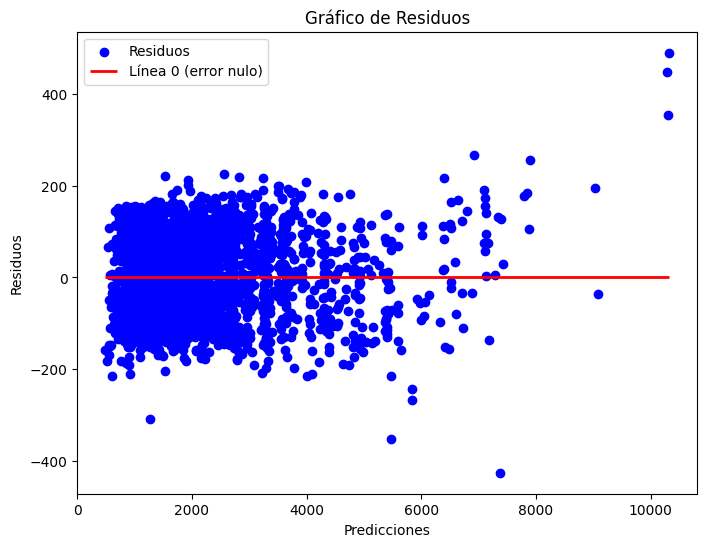

In [ ]:
# Calcular los residuos (errores)
residuos = y_test - y_pred_cat

# Gráfico de los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cat, residuos, color='blue', label='Residuos')
plt.hlines(y=0, xmin=min(y_pred_cat), xmax=max(y_pred_cat), color='red', lw=2, label='Línea 0 (error nulo)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.show()


**CONCLUSIONES**

 El gráfico de residuos revela la diferencia entre las predicciones y los valores reales (es decir, los errores del modelo). Al estar los puntos distribuidos de manera relativamente aleatoria alrededor de la línea horizontal 0, indica que no hay un patrón sistemático en los errores del modelo. Esto sugiere que el modelo no presenta problemas de sobreajuste o de ajuste incorrecto en alguna parte de los datos. Sin embargo, se observa que los residuos para los valores predichos más altos (cerca de 10,000) tienden a ser más grandes, lo que podría indicar que el modelo tiene más dificultades para predecir correctamente los precios más altos.